# 단순 선형회귀 분석 (최소제곱법)

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값 : ", mx)
print("y의 평균값 : ", my)

divisor = sum([(mx - i)**2 for i in x]) #분모
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x,mx,y,my) #분자

print("분자 : ", dividend)
print("분모 : ", divisor)

a = dividend / divisor
b = my - (mx*a)

print("기울기 a: ", a)
print("기울기 b: ", b)

x의 평균값 :  5.0
y의 평균값 :  90.5
분자 :  46.0
분모 :  20.0
기울기 a:  2.3
기울기 b:  79.0


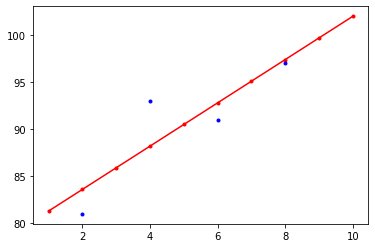

In [11]:
ins = np.linspace(1,10, num=10)
ans = np.dot(a,ins)+b
plt.plot(ins, ans, 'r')
plt.plot(ins, ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

# 단순 선형회귀분석 예제2 (평균제곱오차법)

In [12]:
#기울기a와 절편b
ab = [3, 76]
ab_old = ab

# x와 y
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#작동 시킬 함수
def predict(x):
    return ab[0]*x + ab[1]

#rmse함수 ->  손실함수 -> 실제점수와 예측점수가 얼마나 차이가 있는지 알려주는 함수
def rmse(p,a):
    return np.sqrt(((p-a) **2).mean())

def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" %(x[i], y[i], predict(x[i])))
print("rmse 최종값: " + str(rmse_val(predict_result, y)))

print("기울기 a = ", ab[0])
print("y절편 b = ", ab[1])

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
rmse 최종값: 3.3166247903554
기울기 a =  3
y절편 b =  76


# 경사하강법 (평균제곱오차법 이용)

In [22]:
#작동 시킬 함수
def predict(w,x,b):
    return np.array(np.dot(w, x) + b, "float64")

def rmse(p,a):
    return np.sqrt(((p-a) **2).mean())

def rmse_val(w, x, b, y):
    return rmse(predict(w, x, b), np.array(y))

def nㅇumerical_gradient(f, w, x):
    h = 1e-4
    print("x",x)
    x+h
    print("fxh1",f(x+h,y))
    print("fxh2",f(x-h,y))
    print(2*h)
    print("grad:",(f(x+h,y) -f(x-h,y)) / (2*h))
    return (f(w, x[idx], b, y) -f(x-h,y)) / (2*h)

#미분용 합수
def numerical_gradient(f, w, x, b, y):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        print("w:", w, "x[idx]:", x[idx], "b:", b)
        fxh1 = f(w, x[idx], b, y)
        print("fxh1 :",fxh1)
        x[idx] = tmp_val - h
        fxh2 = f(w, x[idx], b, y)
        print("fxh2 :",fxh2)
      
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    #return (f(x+h,y) -f(x-h,y)) / (2*h)
    
    print("grad:",grad)
    return grad

In [23]:
#경사 하강법     # 함수, x,y데이터, 기울기, 학습률, 학습횟수
def gradient_descent(f, init_data, ab, lr=0.01, step_num=100):
    np_data = np.asarray(init_data, "float64")
    np_ab = np.asarray([ab], "float64")
    #print(np_ab)
    predict_result = []
    #print(init_data)
    x = np.asarray([i[0] for i in init_data],"float64")
    y = np.asarray([i[1] for i in init_data],"float64")
    
    for i in range(step_num):       
        print("predict:",predict( ab[0], x, ab[1]))
        #미분을 통해 기울기 값을 찾아옴
        grad = numerical_gradient(f, ab[0], x, ab[1], y)
        #학습률 * 기울기값을 기존 a,b의 값을 업데이트
        ab += lr* np.mean(grad)

    print("rmse 최종값: " + str(rmse_val(ab[0], x, ab[1], b)))
    return ab.flatten().tolist() 

In [24]:
#학습할 변수
ab = [-6, 40]
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#기존 데이터
print("초기 기울기: ", ab)

print("rmse 최종값: " + str(rmse_val(ab[0], x, ab[1], y)))

# 경사하강법 적용후
new_ab = gradient_descent(rmse_val, data, ab, lr=1, step_num=1)
print("최종 기울기: ", new_ab)

#rmse함수를 미분을 통해 경사하강시키면 손실함수 즉 예측과 실제값의 오차가 갈수록 줄어들게 되고, 값으로는 a와 b를 업데이트 함.

초기 기울기:  [-6, 40]
rmse 최종값: 82.66196223173026
predict: [28. 16.  4. -8.]
w: -6 x[idx]: 2.0001 b: 40
fxh1 : 62.77798181177857
fxh2 : 62.776787114028075
w: -6 x[idx]: 4.0001 b: 40
fxh1 : 74.73345569662892
fxh2 : 74.73225943566807
w: -6 x[idx]: 6.0001 b: 40
fxh1 : 86.70123298062144
fxh2 : 86.70003575754741
w: -6 x[idx]: 8.0001 b: 40
fxh1 : 98.67683720286132
fxh2 : 98.67563934609191
grad: [5.97348875 5.9813048  5.98611537 5.98928385]
rmse 최종값: 33.1047338392824
최종 기울기:  [-0.01745180652056888, 45.98254819347943]


In [25]:
x = [2,4,6,8]
h = 1e-4
x = np.asarray(x, "float64")+h
print(x)

predict_result = predict(ab[0], x, ab[1])
print(predict_result)

[2.0001 4.0001 6.0001 8.0001]
[27.9994 15.9994  3.9994 -8.0006]


In [26]:
print(ab[0], ab[1])

-6 40


In [27]:
np.array(predict_result)

array([27.9994, 15.9994,  3.9994, -8.0006])

In [28]:
predict(ab[0], x, ab[1])

array([27.9994, 15.9994,  3.9994, -8.0006])

In [29]:
rmse(np.array(predict_result), np.array(y))

82.66254653928827

# 학습한 결과

기존    :  [-6, 40]
학습 후 :  [-0.01745180652056888, 45.98254819347943]


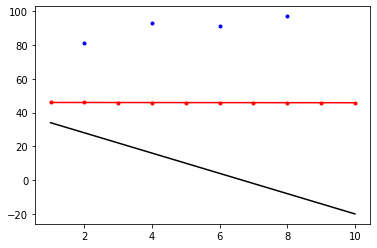

In [30]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

기존    :  [1, 10]
학습 후 :  [13.511488429951534, 22.511488429951534]


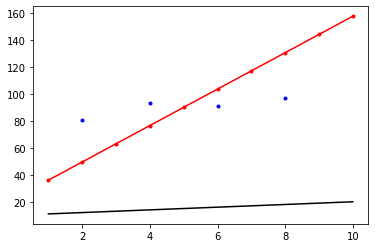

In [201]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

기존    :  [-6, 40]
학습 후 :  [7.415351742589454, 53.41535174258945]


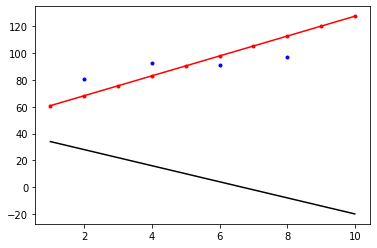

In [203]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

#####  다양한 경우에서 학습이 잘이루어지는 것을 확인할 수 있다. 

# 201601769 나요한

In [8]:
print("기존    : ",ab)
print("학습 후 : ",new_ab)
ins = np.linspace(1,10, num=10)
ans = np.dot(ab[0],ins)+ab[1]
new_ans = np.dot(new_ab[0],ins)+new_ab[1]
plt.plot(ins, ans, 'k')
plt.plot(ins, new_ans, 'r')
plt.plot(ins, new_ans, 'r.')
plt.plot(x, y, 'b.')
plt.show()

기존    :  [-6, 40]


NameError: name 'new_ab' is not defined

In [30]:
def step_gradient(w_cureent, b_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        w_gradient += -(2/N) * x * (y - (w_current * x + b_current))
        b_gradient += -(2/N) (y - (w_current * x + b_current))